### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
#Importing Numpy, Pandas, Matplotlib & Seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading dataset
df = pd.read_csv('vehicle.csv')

In [3]:
#Checking missing values
df.count()

compactness                    846
circularity                    841
distance_circularity           842
radius_ratio                   840
pr.axis_aspect_ratio           844
max.length_aspect_ratio        846
scatter_ratio                  845
elongatedness                  845
pr.axis_rectangularity         843
max.length_rectangularity      846
scaled_variance                843
scaled_variance.1              844
scaled_radius_of_gyration      844
scaled_radius_of_gyration.1    842
skewness_about                 840
skewness_about.1               845
skewness_about.2               845
hollows_ratio                  846
class                          846
dtype: int64

In [4]:
#As per the instruction, dropping NA values
df.dropna(inplace=True)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [5]:
#Printing dependent variable
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

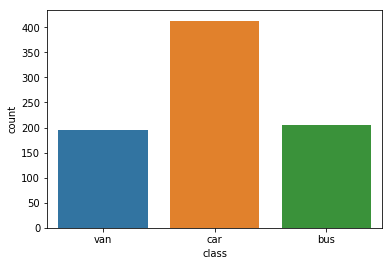

In [6]:
#Plotting dependent variable
sns.countplot(df['class'])
plt.show()

### Check for any missing values in the data 

In [7]:
#Checking missing values
df.count()

compactness                    813
circularity                    813
distance_circularity           813
radius_ratio                   813
pr.axis_aspect_ratio           813
max.length_aspect_ratio        813
scatter_ratio                  813
elongatedness                  813
pr.axis_rectangularity         813
max.length_rectangularity      813
scaled_variance                813
scaled_variance.1              813
scaled_radius_of_gyration      813
scaled_radius_of_gyration.1    813
skewness_about                 813
skewness_about.1               813
skewness_about.2               813
hollows_ratio                  813
class                          813
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [8]:
#Importing zscore submodule from stats module in Scipy library
from scipy.stats import zscore

In [9]:
#Standardizing data using zscore
df_z = df.drop('class', axis=1).apply(zscore)

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [10]:
#Assigning a dummy arrays Cluster_error & cluster_sil_scores
Cluster_error = []
cluster_sil_scores = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [11]:
#Importing Submodule KMeans from cluster module in sklearn library
from sklearn.cluster import KMeans

#Importing metrics module from sklearn library
from sklearn import metrics

In [12]:
#Defining cluster range from 1 to 10
cluster_range = range(1, 11)

#Fit model KMeans for each value of cluster in the range defined in cluster_range
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters)
    clusters.fit(df_z)
    Cluster_error.append(clusters.inertia_)
    labels = clusters.labels_
    
    #Silhouette score doesn't work with 1 cluster
    if(num_clusters == 1):
        cluster_sil_scores.append(np.NaN)
    else:
        cluster_sil_scores.append(metrics.silhouette_score(df_z, labels, metric='euclidean'))

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

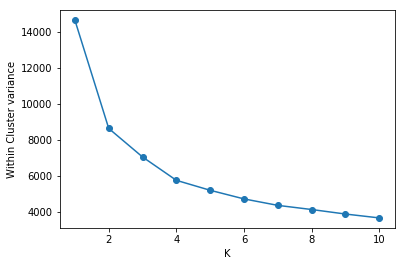

In [13]:
#Plotting Elbow plot
plt.plot(cluster_range, Cluster_error, marker = "o" )
plt.xlabel('K')
plt.ylabel('Within Cluster variance')
plt.show()

### Find out the optimal value of K

In [14]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": Cluster_error , "Avg Sil Score": cluster_sil_scores } )
clusters_df

,num_clusters,cluster_errors,Avg Sil Score
0,1,14634.000000,NaN
1,2,8623.136976,0.389788
2,3,7037.467395,0.290415
3,4,5740.333282,0.302491
4,5,5186.753590,0.248035
5,6,4707.860902,0.211840
6,7,4348.840290,0.221652
7,8,4118.386079,0.210546
8,9,3867.484739,0.198935
9,10,3652.000236,0.198113


### Insights:
From Elbow plot, we can see that there is steep drop in Within cluster variance for K = 2 then after the drop is smooth
Though Silhoutte score is best for K=2 with a score of 0.39 but it is not very good score. Meaning that we might need to treat our Dataframe to further improve our Accuracy.

So, for now, we consider 2 as the best clusters & move ahead

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [15]:
#Observing Centroids for K=2
cluster = KMeans( n_clusters = 2, random_state = 2354 )
cluster.fit(df_z)
df_z_copy = df_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly
centroids = cluster.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.561806,-0.581108,-0.603876,-0.532673,-0.121595,-0.164008,-0.637118,0.607547,-0.638968,-0.537924,-0.612466,-0.639805,-0.533570,0.042026,-0.074586,-0.131531,-0.037021,-0.123349
1,1.057870,1.094214,1.137086,1.003012,0.228961,0.308824,1.199680,-1.143997,1.203164,1.012899,1.153260,1.204740,1.004701,-0.079134,0.140445,0.247671,0.069710,0.232264


### Insights:
We can see that centroids are very well seperated for each dimensions with either of the Centroids falling on either side of the mean for each dimensions

### Use kmeans.labels_ function to print out the labels of the classes

In [16]:
#Printing labels of the Clusters
print(cluster.labels_)

[0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [17]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [18]:
#Combine all three arrays into DataFrame
df_hierarchical = pd.DataFrame(np.concatenate((a,b,c)))
df_hierarchical

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773
5,9.824164,1.444590
6,9.216889,0.960682
7,10.199509,-2.480899
8,12.813390,-1.256776
9,13.841511,4.209154


### 10. Use scatter matrix to print all the 3 distributions

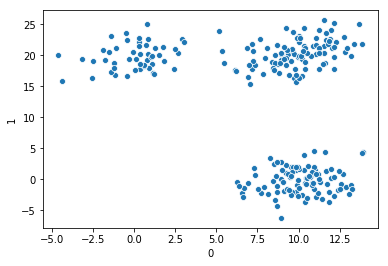

In [19]:
#Plotting scatterplot
sns.scatterplot(df_hierarchical[0], df_hierarchical[1])
plt.show()

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [20]:
#Importing Dendrogram & Linkage Submodules from Cluster.hierarchy submodule in Scipy library
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
#Calculating distance of each datapoint with nearest cluster using ward as linkage metric and distance as Euclidean
dist = linkage(df_hierarchical, method='ward', metric='euclidean')

### 12. Plot the dendrogram for the consolidated dataframe

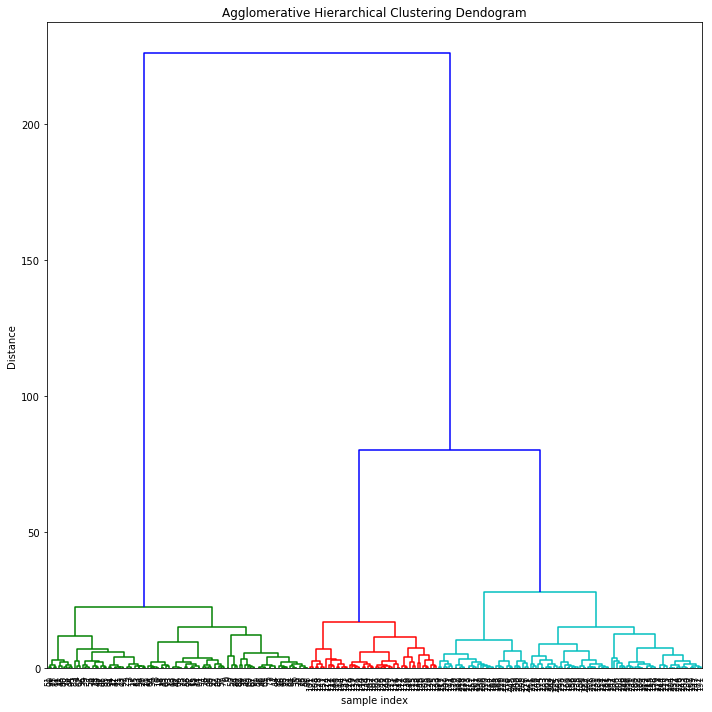

In [22]:
#Plotting Dendrogram
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(dist, leaf_rotation=90.,color_threshold = 60, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

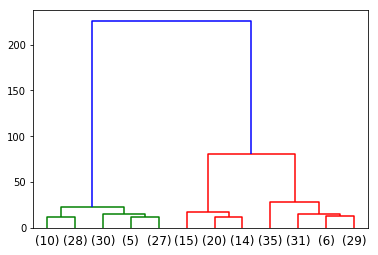

In [23]:
#Recreating the dendrogram for last 2 merged clusters
dendrogram(
    dist,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()